In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
classifier =keras.models.load_model('classifier.h5')
classifier.summary()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-08-26 16:04:50.430668: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-26 16:04:50.431047: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 94, 94, 192)          5376      ['input_1[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 94, 94, 192)          5376      ['input_2[0][0]']             
                                                                                              

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

df_pp = pd.read_csv("pp_labels.csv")
y_pp = np.asarray(df_pp['joint'])
df_no = pd.read_csv("no_labels.csv")
y_no = np.asarray(df_no['joint'])
df_p = pd.read_csv("p_labels.csv")
y_p = np.asarray(df_p['joint'])
df_r = pd.read_csv("r_labels.csv")
y_r = np.asarray(df_r['joint'])
y = np.append(y_pp , y_no)
y = np.append(y , y_p)
y = np.append(y , y_r)
#changing the labels from string to categorical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(y)
y.shape

(800,)

# Importing all the pictures

In [4]:
df = pd.read_excel("data_set_label.xlsx")
x = []
x_visualization = []
for i in range(1 , 51, 1):
    for j in range(1, 51 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            if(i == 1 and j==2 ):
                x_visualization = img
                img= resize(img , (2 , 96 , 96 , 3))
                x =  img
                
            else:
                x_visualization = np.append(x_visualization , img , axis = 0)
                img = resize(img , (2 , 96 , 96 , 3))
                x = np.append(x , img , axis = 0)
for i in range(51 , 101 , 1):
    for j in range(51, 101 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            x_visualization = np.append(x_visualization , img , axis = 0)
            img = resize(img , (2, 96, 96 , 3))
            x = np.append(x , img , axis=0)
for i in range(101 , 151 , 1):
    for j in range(101, 151 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            x_visualization = np.append(x_visualization , img , axis = 0)
            img = resize(img  , (2 , 96 , 96 , 3))
            x = np.append(x , img, axis=0)
for i in range(151 , 201 , 1):
    for j in range(151, 201 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            x_visualization = np.append(x_visualization , img , axis = 0)
            img = resize(img , (2 , 96 , 96 , 3))
            x = np.append(x , img  , axis=0)
del df

In [5]:
from keras.utils import to_categorical 
x_t = np.reshape(x , (-1 , 2 , 96 , 96 , 3))
y_t = to_categorical(Y)
x_1_t, x_2_t = tf.split(x_t, num_or_size_splits=2, axis=1)
x_1_t = tf.squeeze(x_1_t, axis=1)
x_2_t = tf.squeeze(x_2_t, axis=1)

In [6]:
classifier.evaluate([x_1_t , x_2_t] , y_t)

2023-08-12 09:52:53.748002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 59ms/step - loss: 0.1655 - accuracy: 0.9525


[0.16548176109790802, 0.9524999856948853]

In [7]:
classification = classifier.predict([x_1_t,x_2_t])

 1/25 [>.............................] - ETA: 4s

2023-08-12 09:52:57.947005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 55ms/step


In [9]:
from sklearn.metrics import accuracy_score , classification_report 



In [11]:
predicted_class = []
for i in classification:
    predicted_class.append(np.argmax(i))
name_class = []
for i in predicted_class:
    if(i == 2):name_class.append("push_p_joint")
    elif(i == 0):name_class.append("Not articulated")
    elif(i == 1):name_class.append("P-joint")
    elif(i == 3):name_class.append("R-joint")

In [21]:
print(classification_report(Y, predicted_class))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       200
           1       1.00      0.90      0.94       200
           2       0.99      0.94      0.96       200
           3       0.90      0.99      0.94       200

    accuracy                           0.95       800
   macro avg       0.96      0.95      0.95       800
weighted avg       0.96      0.95      0.95       800



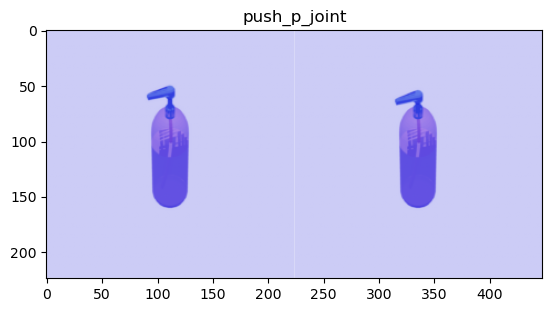

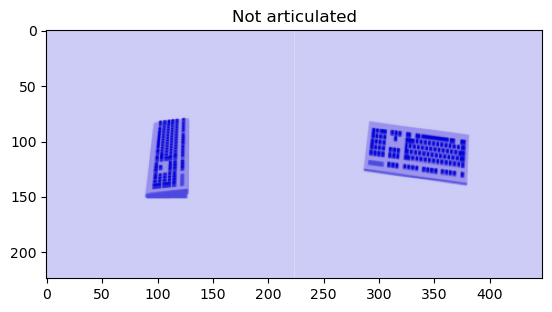

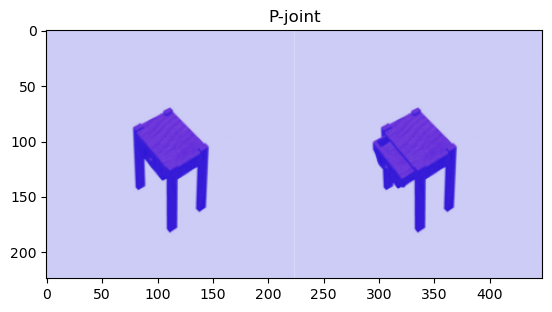

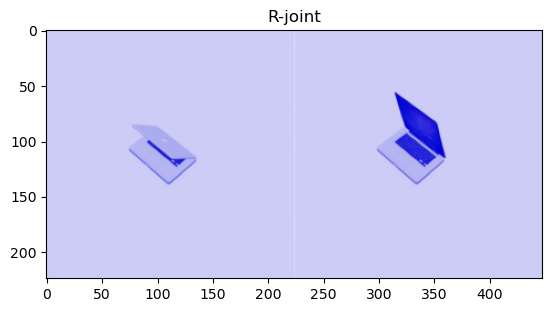

In [22]:
plt.imshow(resize(x_visualization[224*2:224*3] ,(224 , 448 , 4)))
plt.title(name_class[0])
plt.show()
plt.imshow(resize(x_visualization[299*224:300*224] , (224 , 448 , 4)) )
plt.title(name_class[300])
plt.show()
plt.imshow(resize(x_visualization[401*224:402*224] , (224 , 448 , 4)) )
plt.title(name_class[402])
plt.show()

plt.imshow(resize(x_visualization[605*224:606*224] , (224 , 448 , 4)) )
plt.title(name_class[605])
plt.show()

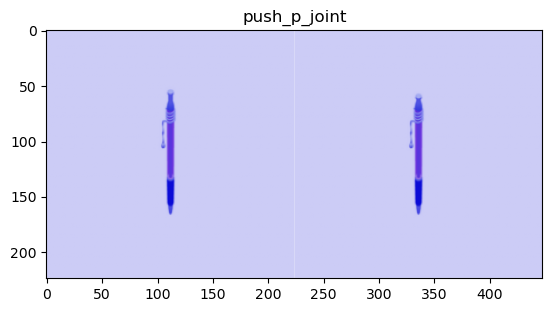

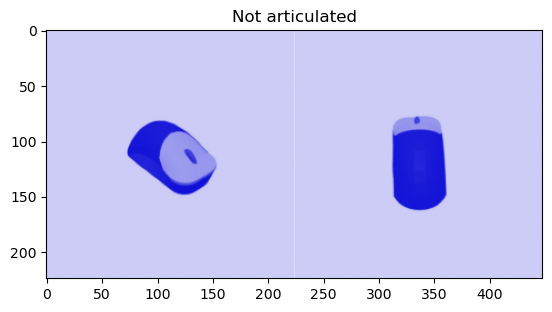

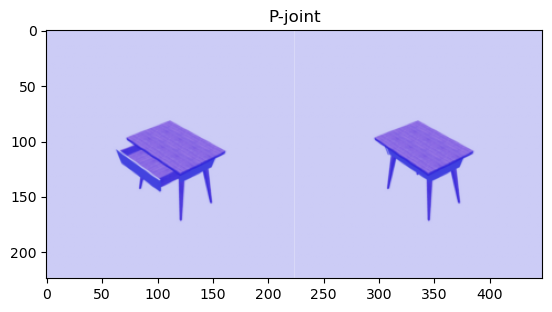

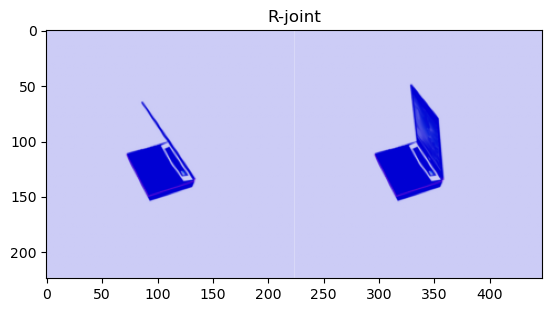

In [25]:
plt.imshow(resize(x_visualization[224*21:224*22] ,(224 , 448 , 4)))
plt.title(name_class[0])
plt.show()
plt.imshow(resize(x_visualization[210*224:211*224] , (224 , 448 , 4)) )
plt.title(name_class[300])
plt.show()
plt.imshow(resize(x_visualization[432*224:433*224] , (224 , 448 , 4)) )
plt.title(name_class[402])
plt.show()

plt.imshow(resize(x_visualization[650*224:651*224] , (224 , 448 , 4)) )
plt.title(name_class[605])
plt.show()

## Regression

In [4]:
df = pd.read_excel("data_set_label.xlsx")
x = []

for i in range(1 , 51, 1):
    for j in range(1, 51 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            if(i == 1 and j==2 ):
                img= np.split(img , indices_or_sections=2 , axis=1)
                x =  img
            else:
                img = np.split(img , indices_or_sections=2 , axis=1)
                x = np.append(x , img , axis = 0)
for i in range(101 , 151 , 1):
    for j in range(101, 151 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = np.split(img , indices_or_sections=2 , axis=1)
            x = np.append(x , img, axis=0)
for i in range(151 , 201 , 1):
    for j in range(151, 201 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = np.split(img , indices_or_sections=2 , axis=1)
            x = np.append(x , img  , axis=0)
del df

df_pp = pd.read_csv("pp_modeling.csv")
label_0 = np.asarray(df_pp['label_0'])
label_1 = np.asarray(df_pp['label_1'])
label_2 = np.asarray(df_pp['label_2'])
label_3 = np.asarray(df_pp['label_3'])

y_pp = np.zeros((200 , 4 ))
for i in range(200):
    l = np.zeros((4))
    l[0]=  label_0[i]
    l[1]=  label_1[i]
    l[2]=  label_2[i]
    l[3]=  label_3[i]
    y_pp[i] = l

df_p = pd.read_csv("p_modeling.csv")
label_0 = np.asarray(df_p['label_0'])
label_1 = np.asarray(df_p['label_1'])
label_2 = np.asarray(df_p['label_2'])
label_3 = np.asarray(df_p['label_3'])

y_p = np.zeros((200 , 4 ))
for i in range(200):
    l = np.zeros((4))
    l[0]=  label_0[i]
    l[1]=  label_1[i]
    l[2]=  label_2[i]
    l[3]=  label_3[i]
    y_p[i] = l

df_r = pd.read_csv("r_modeling.csv")
label_0 = np.asarray(df_r['label_0'])
label_1 = np.asarray(df_r['label_1'])
label_2 = np.asarray(df_r['label_2'])
label_3 = np.asarray(df_r['label_3'])

y_r = np.zeros((200 , 4 ))
for i in range(200):
    l = np.zeros((4))
    l[0]=  label_0[i]
    l[1]=  label_1[i]
    l[2]=  label_2[i]
    l[3]=  label_3[i]
    y_r[i] = l


y = np.append(y_pp , y_p)
y = np.append(y , y_r)

m = x.reshape(600 , 2 , 224 , 224 , 4)
m.shape

y = y.reshape(-1 , 4)
y.shape

mm = np.zeros((600 , 224 , 224 , 3))
j = 0
for i in m:
    mm[j] = resize(i[0]-i[1] , (224 , 224 , 3))
    j = j+1

y_1_train, y_2_train , y_3_train , y_4_train = tf.split(y, num_or_size_splits=4, axis=1)
y_train_n = np.append(y_1_train , y_2_train ,axis=1)
y_train_n = np.append(y_train_n , y_3_train ,axis=1)
y_train_n = np.append(y_train_n , y_4_train ,axis=1)
y_train_n = y_train_n.reshape(len(y_train_n) , 4)

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-08-23 13:10:20.623239: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-23 13:10:20.623554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
PushP_joint_regressor = load_model('motion_detector_push_p.h5')
P_joint_regressor = load_model('motion_detector_p.h5')
R_joint_regressor = load_model('motion_detector_r.h5')

In [ ]:
PushP_joint_regressor.summary()

In [6]:
pred_push_p =  PushP_joint_regressor.predict(mm[0:199])
pred_p =P_joint_regressor.predict(mm[200:399])
pred_r =  R_joint_regressor.predict(mm[400:599])

2023-08-23 13:10:26.431627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/7 [===>..........................] - ETA: 1s

2023-08-23 13:10:29.128603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/7 [===>..........................] - ETA: 0s

2023-08-23 13:10:30.401636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 156ms/step


In [7]:
def draw_arrow(plt, arr_start, arr_end):
       dx = arr_end[0] - arr_start[0]
       dy = arr_end[1] - arr_start[1]
       plt.arrow(arr_start[0], arr_start[1], dx, dy, head_width=5, head_length=5, length_includes_head=True, color='red')

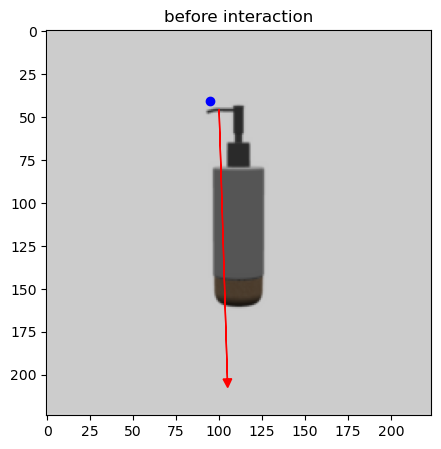

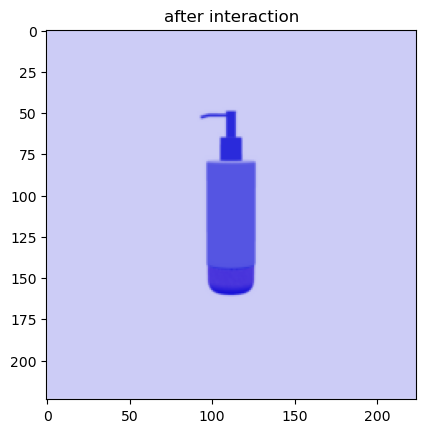

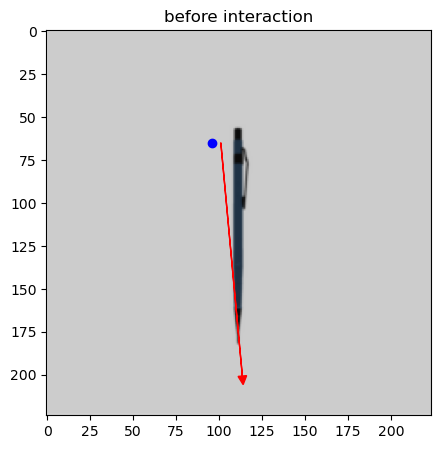

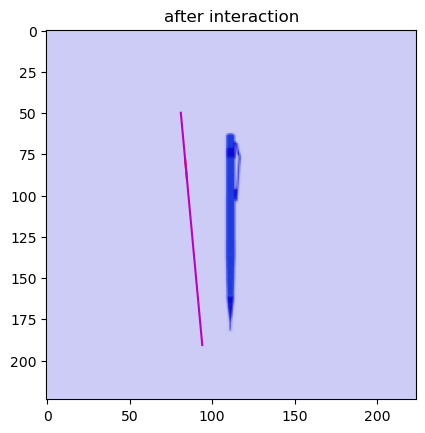

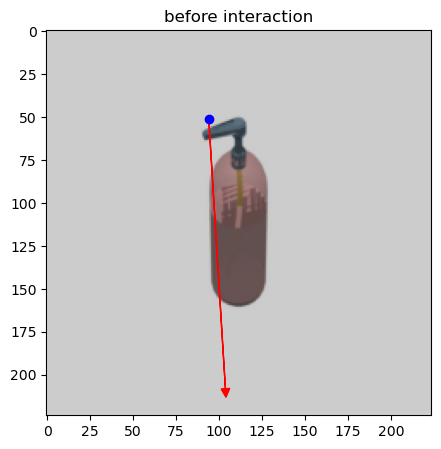

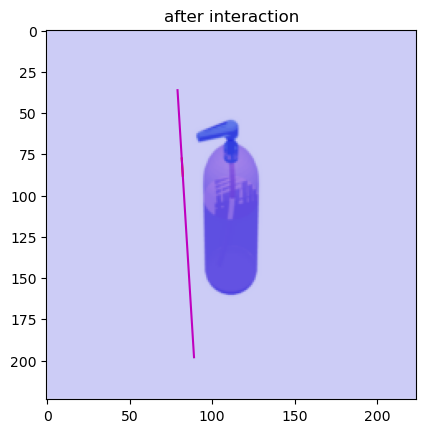

<Figure size 500x500 with 0 Axes>

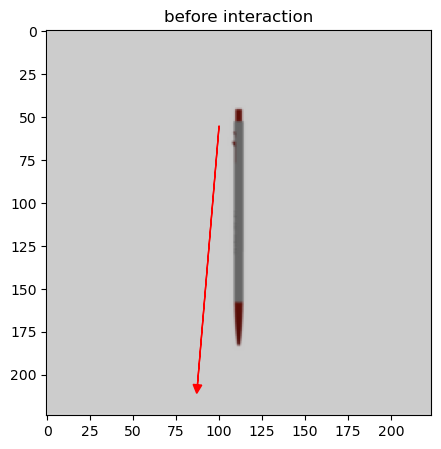

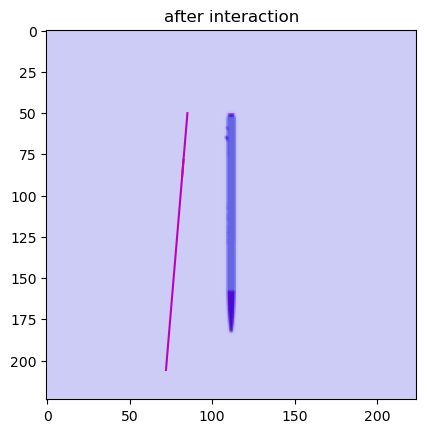

In [52]:
i = 150
slope = (pred_push_p[3][i] - pred_push_p[1][i]) / (pred_push_p[2][i] - pred_push_p[0][i])
from_zero = ((pred_push_p[3][i] - slope*pred_push_p[2][i])+(pred_push_p[1][i] - slope*pred_push_p[0][i]))/2
x_axis = np.linspace(int((200- from_zero*1000)/slope),int((50 - from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))
file_name = str(36)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
plt.scatter(x_axis[-1] , y_axis[-1] , color = 'b' )
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.show()
img_2 = plt.imshow(m[i+1][1])
#plt.plot([pred_push_p[0][i]*1000 , 1000*pred_push_p[2][i]] ,[1000*pred_push_p[1][i] , 1000*pred_push_p[3][i]] , color = 'r' )
#plt.plot(x_axis , y_axis , color = 'm')
plt.title('after interaction')
plt.show()

i = 50
slope = (pred_push_p[3][i] - pred_push_p[1][i]) / (pred_push_p[2][i] - pred_push_p[0][i])
from_zero = ((pred_push_p[3][i] - slope*pred_push_p[2][i])+(pred_push_p[1][i] - slope*pred_push_p[0][i]))/2
x_axis = np.linspace(int((200- from_zero*1000)/slope),int((50 - from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))
file_name = str(12)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.scatter(x_axis[-1]+15 , y_axis[-1]+15 , color = 'b' )
plt.show()
img_2 = plt.imshow(m[i+1][1])
plt.plot([pred_push_p[0][i]*1000 , 1000*pred_push_p[2][i]] ,[1000*pred_push_p[1][i] , 1000*pred_push_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm')
plt.title('after interaction')
plt.show()

i = 1
slope = (pred_push_p[3][i] - pred_push_p[1][i]) / (pred_push_p[2][i] - pred_push_p[0][i])
from_zero = ((pred_push_p[3][i] - slope*pred_push_p[2][i])+(pred_push_p[1][i] - slope*pred_push_p[0][i]))/2
x_axis = np.linspace(int((200- from_zero*1000)/slope),int((50 - from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))
file_name = str(1)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.scatter(x_axis[-1]+15 , y_axis[-1]+15 , color = 'b' )
plt.show()
img_2 = plt.imshow(m[i+1][1])
plt.plot([pred_push_p[0][i]*1000 , 1000*pred_push_p[2][i]] ,[1000*pred_push_p[1][i] , 1000*pred_push_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm')
plt.title('after interaction')
plt.show()

i = 65
slope = (pred_push_p[3][i] - pred_push_p[1][i]) / (pred_push_p[2][i] - pred_push_p[0][i])
from_zero = ((pred_push_p[3][i] - slope*pred_push_p[2][i])+(pred_push_p[1][i] - slope*pred_push_p[0][i]))/2
x_axis = np.linspace(int((200- from_zero*1000)/slope),int((50 - from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))
fig = plt.figure(figsize =(5, 5))
file_name = str(16)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
#plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.show()
img_2 = plt.imshow(m[i+1][1])
plt.plot([pred_push_p[0][i]*1000 , 1000*pred_push_p[2][i]] ,[1000*pred_push_p[1][i] , 1000*pred_push_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm')
plt.title('after interaction')
plt.show()

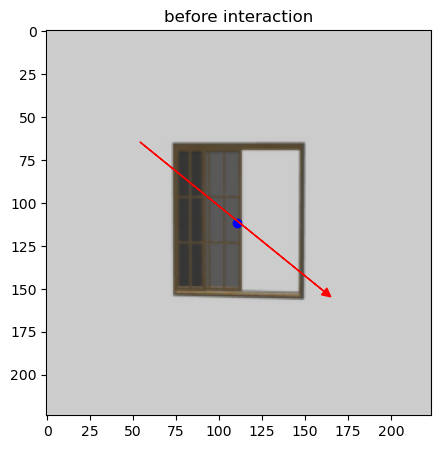

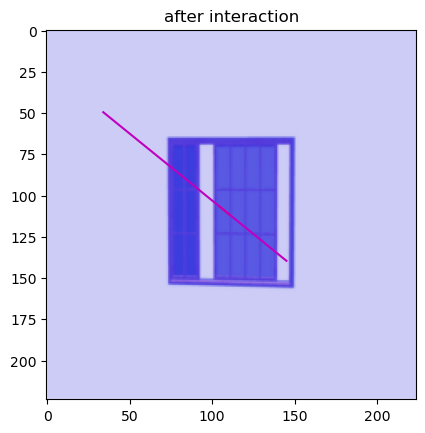

<Figure size 500x500 with 0 Axes>

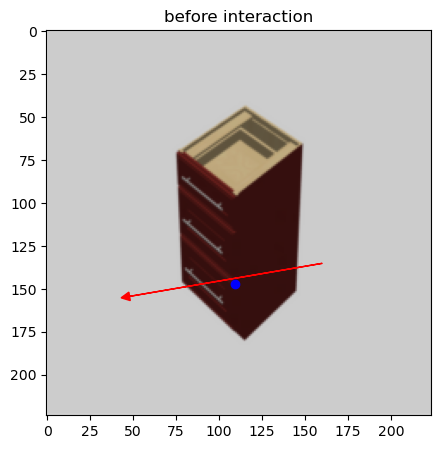

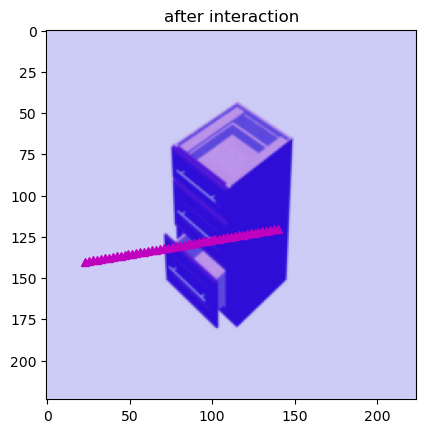

<Figure size 500x500 with 0 Axes>

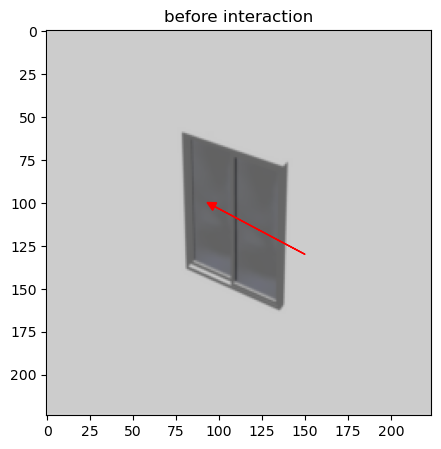

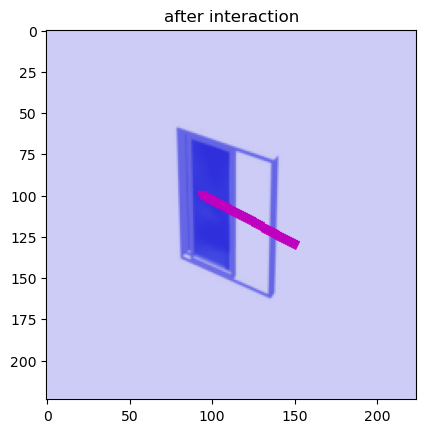

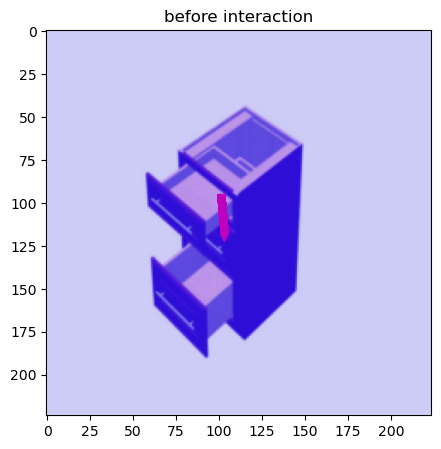

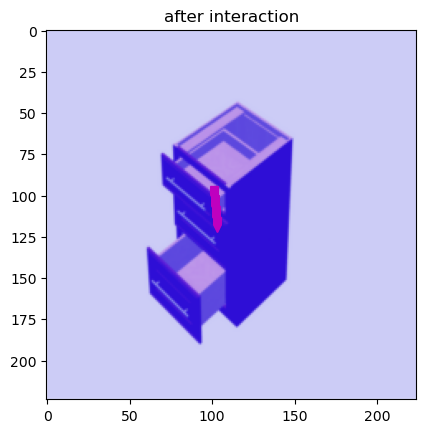

In [49]:
i = 42
slope = (pred_p[3][i] - pred_p[1][i]) / (pred_p[2][i] - pred_p[0][i])
from_zero = ((pred_p[3][i] - slope*pred_p[2][i])+(pred_p[1][i] - slope*pred_p[0][i]))/2
x_axis = np.linspace(int((140-from_zero*1000)/slope),int((50-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))
file_name = str(111)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
plt.scatter(pred_p[0][i]*1000 , pred_p[1][i]*1000, color = 'b' )
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.show()
img_2 = plt.imshow(m[199+i+1][1])
plt.plot([pred_p[0][i]*1000 , 1000*pred_p[2][i]] ,[1000*pred_p[1][i] , 1000*pred_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' )
plt.title('after interaction')
plt.show()

i = 93
slope = (pred_p[3][i] - pred_p[1][i]) / (pred_p[2][i] - pred_p[0][i])
from_zero = ((pred_p[3][i] - slope*pred_p[2][i])+(pred_p[1][i] - slope*pred_p[0][i]))/2
x_axis = np.linspace(int((140-from_zero*1000)/slope),int((120-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))

fig = plt.figure(figsize =(5, 5))
file_name = str(121)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.scatter(pred_p[0][i]*1000-20 , pred_p[1][i]*1000+25, color = 'b' )
plt.show()
img_2 = plt.imshow(m[199+i+1][1])
plt.plot([pred_p[0][i]*1000 , 1000*pred_p[2][i]] ,[1000*pred_p[1][i] , 1000*pred_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = '^')
plt.title('after interaction')
plt.show()


i = 77
slope = (pred_p[3][i] - pred_p[1][i]) / (pred_p[2][i] - pred_p[0][i])
from_zero = ((pred_p[3][i] - slope*pred_p[2][i])+(pred_p[1][i] - slope*pred_p[0][i]))/2
x_axis = np.linspace(int((130-from_zero*1000)/slope),int((100-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))

fig = plt.figure(figsize =(5, 5))
file_name = str(120)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
draw_arrow(plt , [x_axis[0] , y_axis[0]] , [x_axis[-1] , y_axis[-1]] )
plt.show()
img_2 = plt.imshow(m[199+i+1][1])
plt.plot([pred_p[0][i]*1000 , 1000*pred_p[2][i]] ,[1000*pred_p[1][i] , 1000*pred_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
plt.title('after interaction')
plt.show()


i =109
slope = (pred_p[3][i] - pred_p[1][i]) / (pred_p[2][i] - pred_p[0][i])
from_zero = ((pred_p[3][i] - slope*pred_p[2][i])+(pred_p[1][i] - slope*pred_p[0][i]))/2
x_axis = np.linspace(int((130-from_zero*1000)/slope),int((100-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))

img_1 = plt.imshow(m[199+i][0])
plt.title("before interaction")
plt.plot([pred_p[0][i]*1000 , 1000*pred_p[2][i]] ,[1000*pred_p[1][i] , 1000*pred_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
plt.show()
img_2 = plt.imshow(m[199+i+1][1])
plt.plot([pred_p[0][i]*1000 , 1000*pred_p[2][i]] ,[1000*pred_p[1][i] , 1000*pred_p[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
plt.title('after interaction')
plt.show()

<Figure size 500x500 with 0 Axes>

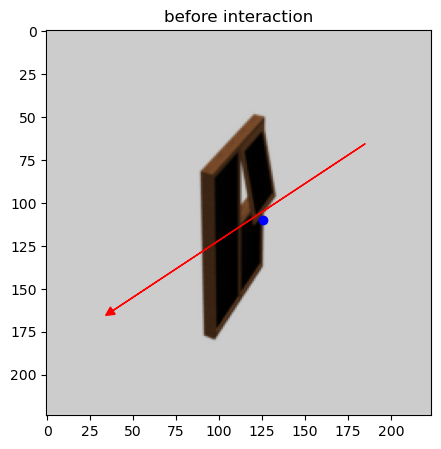

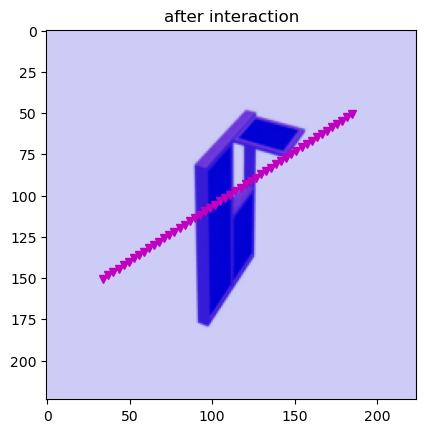

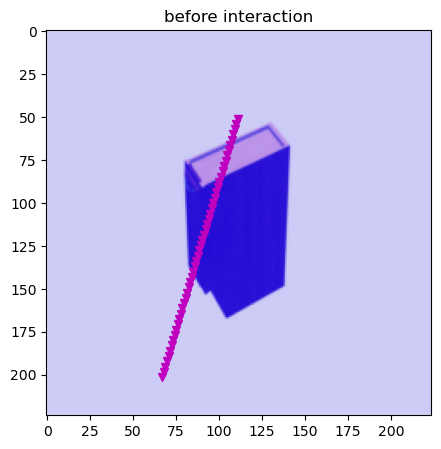

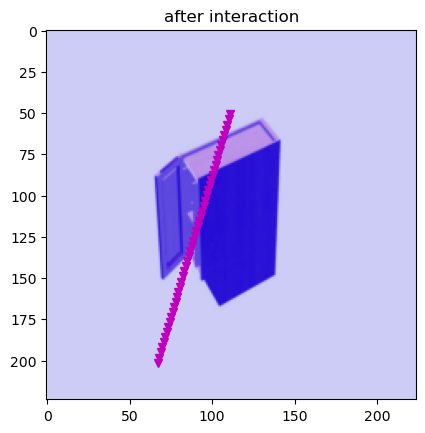

<Figure size 500x500 with 0 Axes>

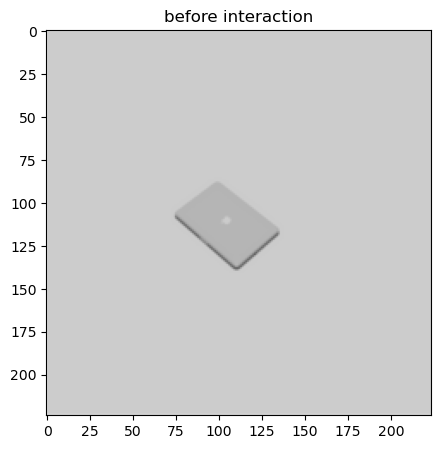

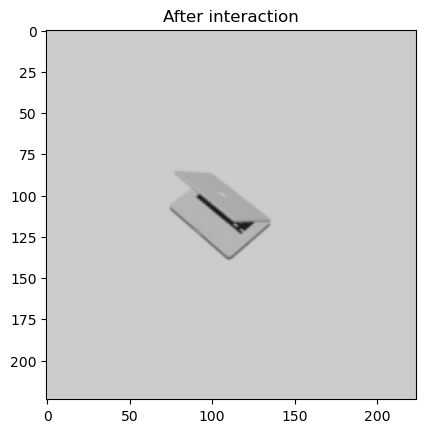

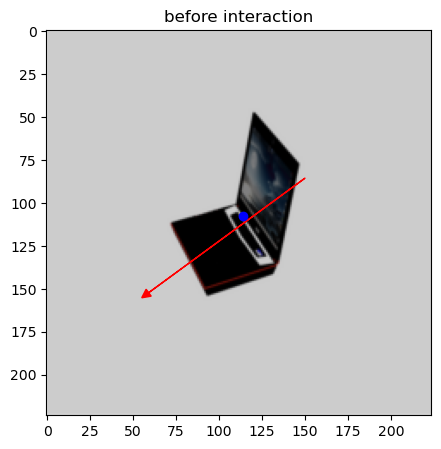

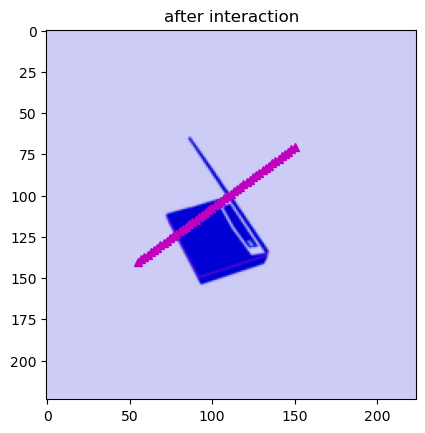

In [38]:
i = 195
slope = (pred_r[3][i] - pred_r[1][i]) / (pred_r[2][i] - pred_r[0][i])
from_zero = ((pred_r[3][i] - slope*pred_r[2][i])+(pred_r[1][i] - slope*pred_r[0][i]))/2
x_axis = np.linspace(int((150-from_zero*1000)/slope),int((50-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))

fig = plt.figure(figsize =(5, 5))
file_name = str(197)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
plt.scatter(pred_p[0][i]*1000 , pred_p[1][i]*1000, color = 'b' )
draw_arrow(plt , [x_axis[-1] , y_axis[-1]+15]  , [x_axis[0] , y_axis[0]+15])
plt.show()
img_2 = plt.imshow(m[399+i+1][1])
plt.plot([1000*pred_r[0][i] , 1000*pred_r[2][i]] ,[1000*pred_r[1][i] , 1000*pred_r[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
plt.title('after interaction')
plt.show()

i = 62
slope = (pred_r[3][i] - pred_r[1][i]) / (pred_r[2][i] - pred_r[0][i])
from_zero = ((pred_r[3][i] - slope*pred_r[2][i])+(pred_r[1][i] - slope*pred_r[0][i]))/2
x_axis = np.linspace(int((200-from_zero*1000)/slope),int((50-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))

img_1 = plt.imshow(m[399+i][0])
plt.title("before interaction")
plt.plot([1000*pred_r[0][i] , 1000*pred_r[2][i]] ,[1000*pred_r[1][i] , 1000*pred_r[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
plt.show()
img_2 = plt.imshow(m[399+i+1][1])
plt.plot([1000*pred_r[0][i] , 1000*pred_r[2][i]] ,[1000*pred_r[1][i] , 1000*pred_r[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = 'v')
plt.title('after interaction')
plt.show()

i = 17
slope = (pred_r[3][i] - pred_r[1][i]) / (pred_r[2][i] - pred_r[0][i])
from_zero = ((pred_r[3][i] - slope*pred_r[2][i])+(pred_r[1][i] - slope*pred_r[0][i]))/2
x_axis = np.linspace(int((140-from_zero*1000)/slope),int((70-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))

fig = plt.figure(figsize =(5, 5))
file_name = str(151)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
#draw_arrow(plt , [x_axis[0] , y_axis[0]+15] , [x_axis[-1] , y_axis[-1]+15]  )
plt.show()
file_name = str(152)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("After interaction")
i = 41
slope = (pred_r[3][i] - pred_r[1][i]) / (pred_r[2][i] - pred_r[0][i])
from_zero = ((pred_r[3][i] - slope*pred_r[2][i])+(pred_r[1][i] - slope*pred_r[0][i]))/2
x_axis = np.linspace(int((140-from_zero*1000)/slope),int((70-from_zero*1000)/slope))
y_axis = slope*x_axis+from_zero*1000

fig = plt.figure(figsize =(5, 5))
file_name = str(165)+".png"
img = imread(file_name)
img_1 = plt.imshow(resize(img , (224 , 224 , 4)))
plt.title("before interaction")
draw_arrow(plt , [x_axis[-1] , y_axis[-1]]  , [x_axis[0] , y_axis[0]])
plt.scatter(pred_p[0][i]*1000, pred_p[1][i]*1000, color = 'b' )
plt.show()
img_2 = plt.imshow(m[399+i+1][1])
plt.plot([1000*pred_r[0][i] , 1000*pred_r[2][i]] ,[1000*pred_r[1][i] , 1000*pred_r[3][i]] , color = 'r' )
plt.plot(x_axis , y_axis , color = 'm' , marker = '^')
plt.title('after interaction')
plt.show()

In [89]:
y_1_train

<tf.Tensor: shape=(600, 1), dtype=float64, numpy=
array([[ 47.],
       [ 47.],
       [ 47.],
       [ 47.],
       [ 47.],
       [ 48.],
       [ 48.],
       [ 48.],
       [ 47.],
       [ 48.],
       [ 50.],
       [ 50.],
       [ 47.],
       [ 48.],
       [ 50.],
       [ 51.],
       [ 47.],
       [ 48.],
       [ 50.],
       [ 51.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 52.],
       [ 52.],
       [ 52.],
       [ 50.],
       [ 52.],
       [ 54.],
       [ 54.],
       [ 50.],
       [ 52.],
       [ 54.],
       [ 56.],
       [ 50.],
       [ 52.],
       [ 54.],
       [ 56.],
       [ 51.],
       [ 51.],
       [ 51.],
       [ 51.],
       [ 51.],
       [ 53.],
       [ 53.],
       [ 53.],
       [ 51.],
       [ 53.],
       [ 55.],
       [ 55.],
       [ 51.],
       [ 53.],
       [ 55.],
       [ 58.],
       [ 51.],
       [ 53.],
       [ 55.],
       [ 58.],
       [ 42.],
       [ 42.],
       [ 42.],
     

In [97]:
PushP_joint_regressor.evaluate(mm[0:199] , y_train_n[0:199]/1000)

7/7 [==============================] - 1s 156ms/step - loss: 0.0015 - dense_4_loss: 3.6905e-04 - dense_5_loss: 3.9890e-04 - dense_6_loss: 3.7618e-04 - dense_7_loss: 3.8256e-04 - dense_4_mean_squared_error: 7.3809e-04 - dense_5_mean_squared_error: 7.9780e-04 - dense_6_mean_squared_error: 7.5236e-04 - dense_7_mean_squared_error: 7.6512e-04


[0.0015266856644302607,
 0.00036904655280523,
 0.0003988996031694114,
 0.0003761815605685115,
 0.0003825579187832773,
 0.00073809310561046,
 0.0007977992063388228,
 0.000752363121137023,
 0.0007651158375665545]

In [104]:
from sklearn.metrics import r2_score 

In [177]:
print("average regression accuracy based on absolote sum :" , 1 - np.abs((np.sum(pred_p)-np.sum(y_train_n[0:199])/1000))/198)
print("average regression accuracy based on squared sum :" , 1 - np.abs(np.sum(np.square(pred_p)-np.square(y_train_n[0:199]/1000))/198))

average regression accuracy based on absolote sum : 0.9248368974165483
average regression accuracy based on squared sum : 0.9539854054119563


In [176]:
print("average regression accuracy based on absolote sum :" , 1 - np.abs((np.sum(pred_push_p)-np.sum(y_train_n[200:399])/1000))/198)
print("average regression accuracy based on squared sum :" , 1 - np.abs(np.sum(np.square(pred_push_p)-np.square(y_train_n[200:399]/1000))/198))

average regression accuracy based on absolote sum : 0.9183215415261008
average regression accuracy based on squared sum : 0.9149575293349551


In [175]:
print("average regression accuracy based on absolote sum :" , 1 - np.abs((np.sum(pred_r)-np.sum(y_train_n[400:599])/1000))/199)
print("average regression accuracy based on squared sum :" , 1 - np.abs(np.sum(np.square(pred_r)-np.square(y_train_n[400:599]/1000))/199))

average regression accuracy based on absolote sum : 0.9906555838273399
average regression accuracy based on squared sum : 0.9663471575576924


## Using SVM for regression 

In [288]:
from skimage.color import rgb2gray
from sklearn.svm import SVR


In [339]:
reg = SVR(kernel = 'rbf')

x_traning = mm[0:199 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[0:199] , axis = 1)/1000
reging = reg.fit(x_traning ,y_training )
pred = reging.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.6723067808405372
0.7450072045271754


In [340]:
x_traning = mm[200:399 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[200:399] , axis = 1)/1000
reging = reg.fit(x_traning ,y_training )
pred = reging.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.803626291959766
0.8330952056106169


In [341]:
x_traning = mm[400:599 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[400:599] , axis = 1)/1000
reging = reg.fit(x_traning ,y_training )
pred = reging.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.8297454124982081
0.8481836218113619


In [342]:
reg = SVR(kernel = 'poly')

x_traning = mm[0:199 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[0:199] , axis = 1)/1000
reging = reg.fit(x_traning ,y_training )
pred = reg.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.6950827201212342
0.7640412775206982


In [344]:
x_traning = mm[200:399 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[200:399] , axis = 1)/1000
reging = reg.fit(x_traning ,y_training )
pred = reg.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.8575856883183405
0.8769214470338091


In [345]:
x_traning = mm[400:599 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[400:599] , axis = 1)/1000
reging = reg.fit(x_traning ,y_training )
pred = reg.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.7944955375762509
0.8193954895581723


## Random forest Regressor

In [346]:
from sklearn.ensemble import RandomForestRegressor


x_traning = mm[0:199 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[0:199] , axis = 1)/1000
regr = RandomForestRegressor(max_depth=1, random_state=0)
regr.fit(x_traning , y_training)
pred = regr.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.9534604042763725
0.9671769451598474


In [347]:

x_traning = mm[200:399 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[200:399] , axis = 1)/1000
regr = RandomForestRegressor(max_depth=1, random_state=0)
regr.fit(x_traning , y_training)
pred = regr.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.9037559996259826
0.9167787009325407


In [348]:
x_traning = mm[400:599 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[400:599] , axis = 1)/1000
regr = RandomForestRegressor(max_depth=1, random_state=0)
regr.fit(x_traning , y_training)
pred = regr.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.8581566481555294
0.8768196307280798


## MLP Regressor

In [336]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes = (1 , 350) , activation = 'relu' )
x_traning = mm[0:199 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[0:199] , axis = 1)/1000
regr.fit(x_traning , y_training)
pred = regr.predict(x_traning)
print(1 - 4*np.abs(np.sum(pred) - np.sum(y_training))/199)
print(1 - 4*np.abs(np.sum(np.square(pred)) - np.sum(np.square(y_training)))/199)

0.7306732718536431
0.8026390170291047


In [335]:
regr = MLPRegressor(hidden_layer_sizes = (1 , 350) , activation = 'relu' )
x_traning = mm[200:399 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[200:399] , axis = 1)/1000
regr.fit(x_traning , y_training)
pred = regr.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.716178640670809
0.7423540940212034


In [338]:
regr = MLPRegressor(hidden_layer_sizes = (1 , 350) , activation = 'relu' )
x_traning = mm[400:599 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[400:599] , axis = 1)/1000
regr.fit(x_traning , y_training)
pred = regr.predict(x_traning)
print(1 - 4*np.sum(np.abs(pred-y_training))/199)
print(1 - 4*np.sum(np.abs(np.square(pred) - np.square(y_training)))/199)

0.6853155427947173
0.7159081129650442


In [349]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1),('lr', reg3)])

x_traning = mm[0:199 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[0:199] , axis = 1)/1000
ereg.fit(x_traning , y_training)
pred = ereg.predict(x_traning)

print(1 - np.sum(np.abs(pred-y_training)))
print(1 - np.sum(np.abs(np.square(pred) - np.square(y_training))))

0.7354524274270414
0.8181188872766703


In [350]:
x_traning = mm[200:399 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[200:399] , axis = 1)/1000

ereg.fit(x_traning , y_training)
pred = ereg.predict(x_traning)

print(1 - np.sum(np.abs(pred-y_training)))
print(1 - np.sum(np.abs(np.square(pred) - np.square(y_training))))

0.8578014224610221
0.8759367472906893


In [351]:
x_traning = mm[400:599 , :].reshape(199 , -1)
y_training = np.sum(y_train_n[400:599] , axis = 1)/1000
ereg.fit(x_traning , y_training)
pred = ereg.predict(x_traning)

print(1 - np.sum(np.abs(pred-y_training)))
print(1 - np.sum(np.abs(np.square(pred) - np.square(y_training))))

0.5847393624224343
0.6276326560173924
